In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mock-test-2-mse-2/sample_submission.csv
/kaggle/input/mock-test-2-mse-2/train.csv
/kaggle/input/mock-test-2-mse-2/test.csv


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [143]:
train=pd.read_csv("/kaggle/input/mock-test-2-mse-2/train.csv")
test=pd.read_csv("/kaggle/input/mock-test-2-mse-2/test.csv")

In [144]:
test_ids = test['id'].copy()

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)


In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         15000 non-null  float64
 1   Drug           8459 non-null   object 
 2   Age            15000 non-null  float64
 3   Sex            15000 non-null  object 
 4   Ascites        8460 non-null   object 
 5   Hepatomegaly   8457 non-null   object 
 6   Spiders        8448 non-null   object 
 7   Edema          15000 non-null  object 
 8   Bilirubin      15000 non-null  float64
 9   Cholesterol    6625 non-null   float64
 10  Albumin        15000 non-null  float64
 11  Copper         8343 non-null   float64
 12  Alk_Phos       8453 non-null   float64
 13  SGOT           8449 non-null   float64
 14  Tryglicerides  6578 non-null   float64
 15  Platelets      14418 non-null  float64
 16  Prothrombin    14981 non-null  float64
 17  Stage          15000 non-null  float64
 18  Status

In [146]:
train.isnull().sum()

N_Days              0
Drug             6541
Age                 0
Sex                 0
Ascites          6540
Hepatomegaly     6543
Spiders          6552
Edema               0
Bilirubin           0
Cholesterol      8375
Albumin             0
Copper           6657
Alk_Phos         6547
SGOT             6551
Tryglicerides    8422
Platelets         582
Prothrombin        19
Stage               0
Status              0
dtype: int64

In [147]:
test.isnull().sum()

N_Days              0
Drug             4300
Age                 0
Sex                 0
Ascites          4296
Hepatomegaly     4300
Spiders          4303
Edema               0
Bilirubin           0
Cholesterol      5558
Albumin             0
Copper           4372
Alk_Phos         4304
SGOT             4304
Tryglicerides    5578
Platelets         357
Prothrombin        14
Stage               0
dtype: int64

In [148]:
y = train["Status"]
train= train.drop("Status", axis=1)


In [149]:
y = pd.DataFrame(y)

In [150]:
le=LabelEncoder()
y["Status"]=le.fit_transform(y["Status"])

In [151]:
cat=[col for col in train.columns if train[col].dtype=='object']
num =[num for num in train.columns if num not in cat]

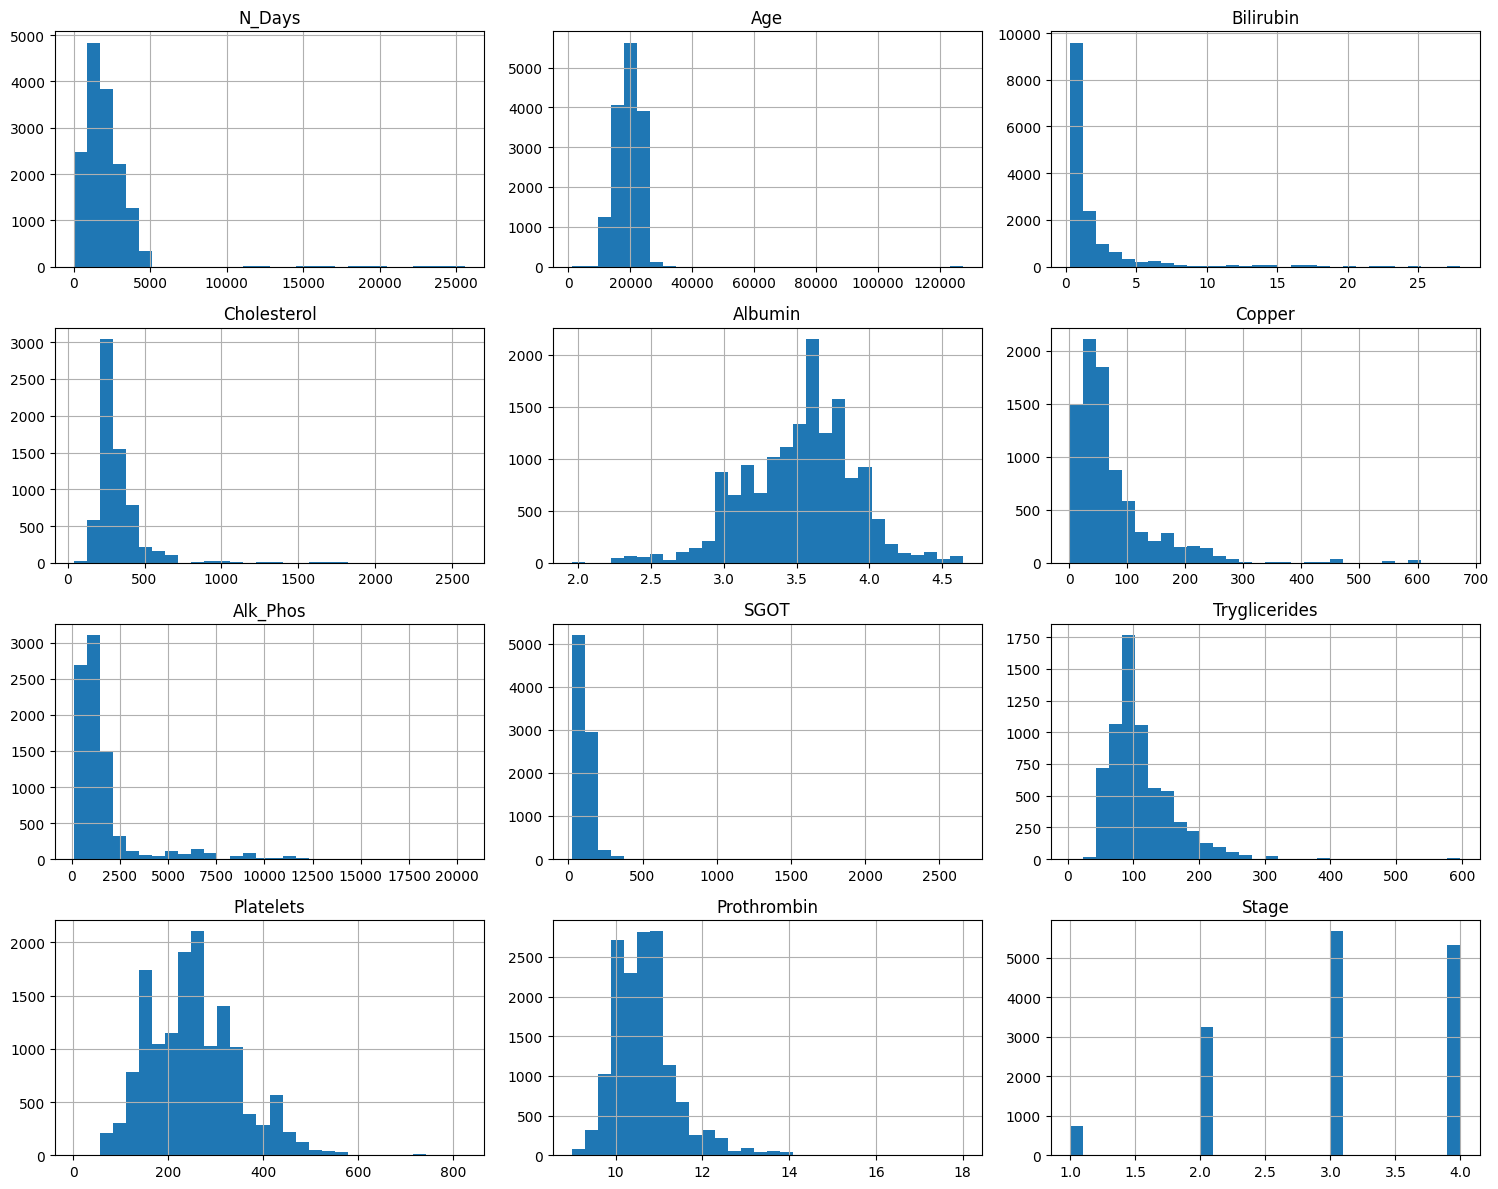

In [152]:
train[num].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


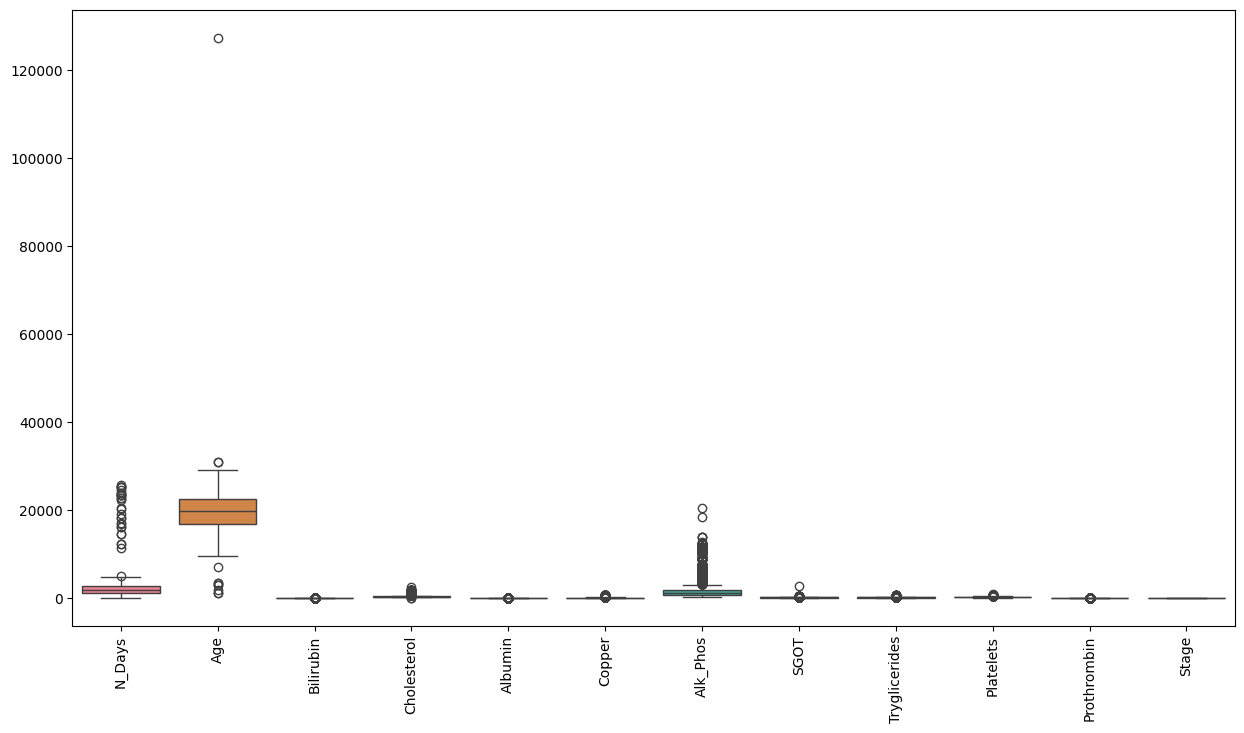

In [153]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=train[num])
plt.xticks(rotation=90)
plt.show()


In [154]:
cat

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [155]:
num

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [156]:
for col in num:
    median = train[col].median()
    train[col] = train[col].fillna(median)
    test[col] = test[col].fillna(median)

for col in cat:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)
    test[col] = test[col].fillna(mode)


In [157]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

enc_train = ohe.fit_transform(train[cat])
enc_test = ohe.transform(test[cat])

enc_train_df = pd.DataFrame(enc_train, columns=ohe.get_feature_names_out(cat), index=train.index)
enc_test_df = pd.DataFrame(enc_test, columns=ohe.get_feature_names_out(cat), index=test.index)

train = pd.concat([train.drop(cat, axis=1), enc_train_df], axis=1)
test = pd.concat([test.drop(cat, axis=1), enc_test_df], axis=1)




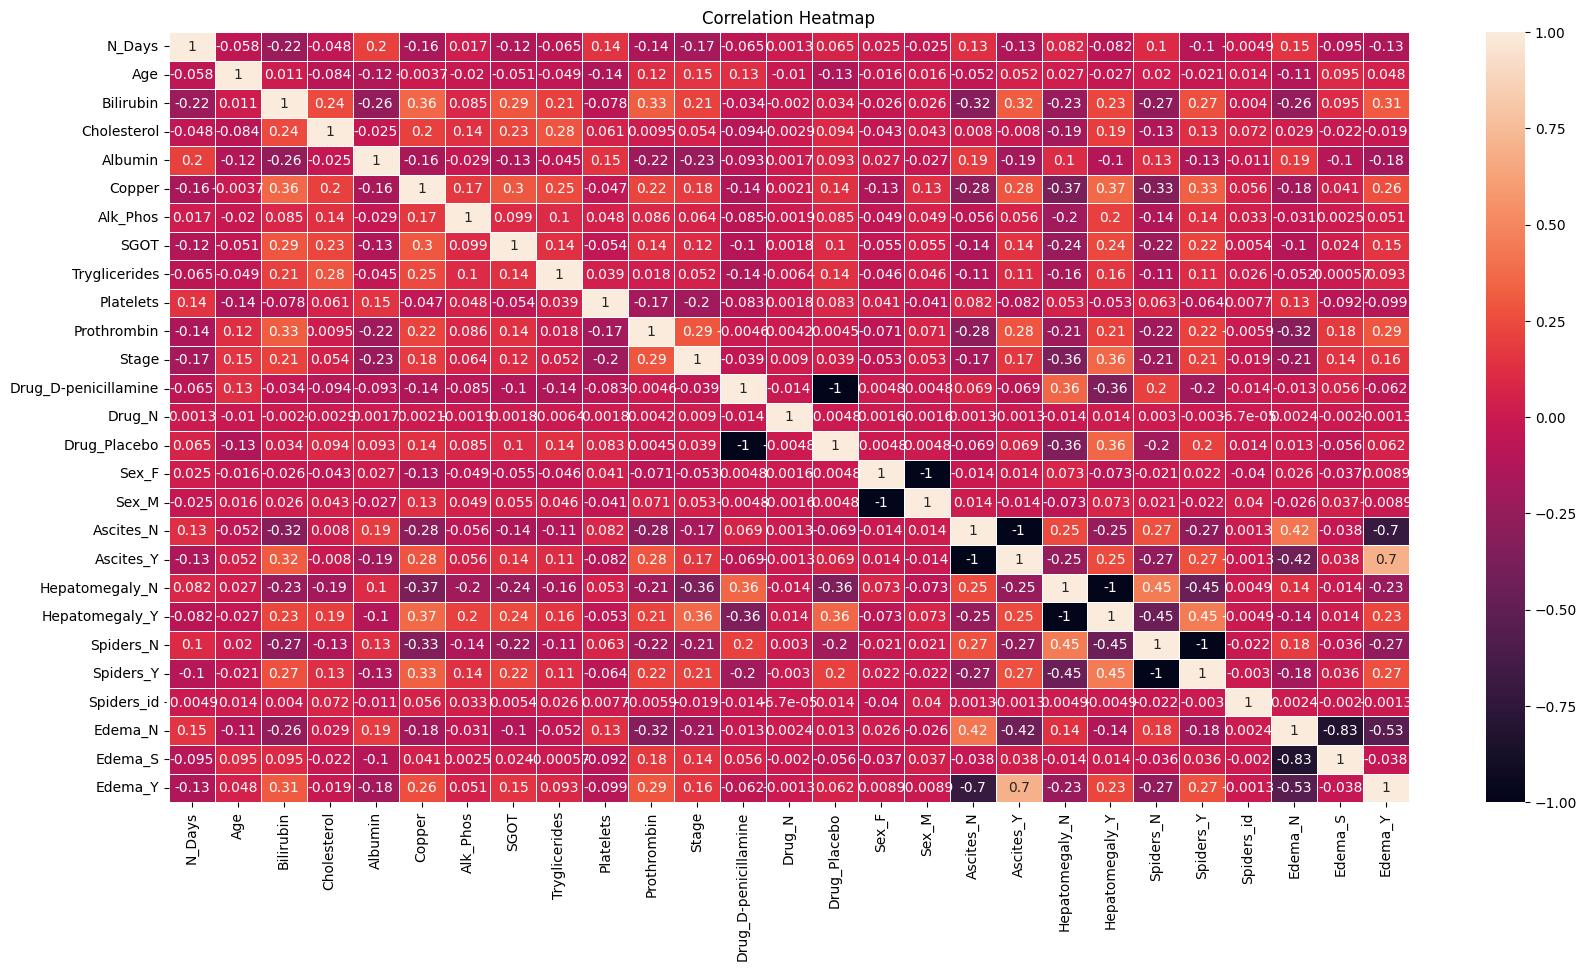

In [158]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [159]:
train.isnull().sum()

N_Days                  0
Age                     0
Bilirubin               0
Cholesterol             0
Albumin                 0
Copper                  0
Alk_Phos                0
SGOT                    0
Tryglicerides           0
Platelets               0
Prothrombin             0
Stage                   0
Drug_D-penicillamine    0
Drug_N                  0
Drug_Placebo            0
Sex_F                   0
Sex_M                   0
Ascites_N               0
Ascites_Y               0
Hepatomegaly_N          0
Hepatomegaly_Y          0
Spiders_N               0
Spiders_Y               0
Spiders_id              0
Edema_N                 0
Edema_S                 0
Edema_Y                 0
dtype: int64

In [160]:
x_train,x_test,y_train,y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [161]:
param_dist = {
    'n_estimators': [100,200,150,300],
    'max_depth': [None, 10,12,15,18,20],
    'min_samples_split': [2,3,4,5,10],
    'min_samples_leaf': [2,4,5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

rf = RandomForestClassifier(random_state=42)

tuner = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)

tuner.fit(x_train, y_train)
print("Best Parameters:", tuner.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 18, 'bootstrap': True}


In [162]:
best_rf = tuner.best_estimator_
y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8463333333333334


In [163]:
best_rf.fit(train, y)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=18, max_features='log2', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=200, random_state=42)

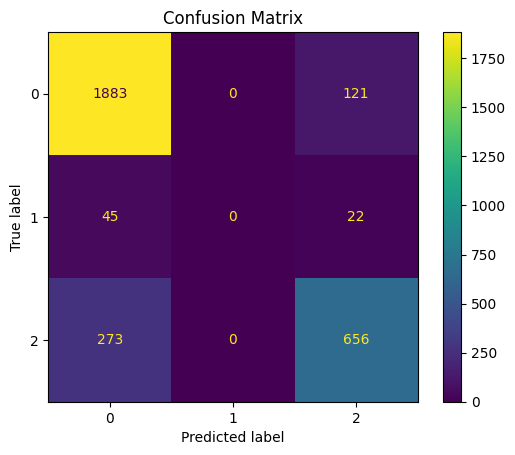

In [166]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


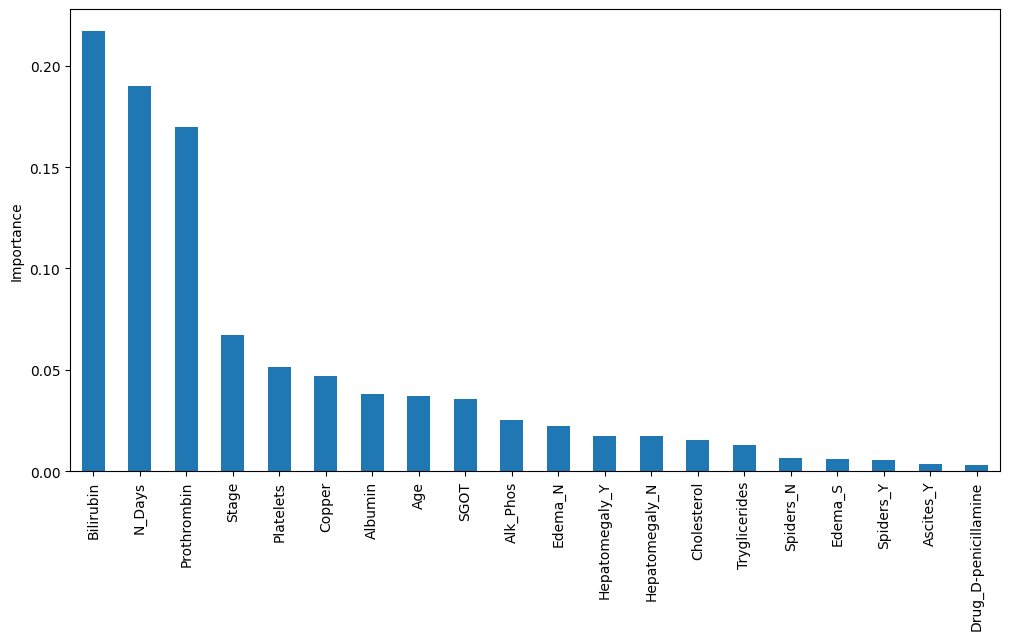

In [167]:

importances = pd.Series(best_rf.feature_importances_, index=train.columns)
importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,6))
plt.ylabel("Importance")
plt.show()

In [168]:
pred = best_rf.predict_proba(test) # for multiclass 2 
 # pred = best_rf.predict(test) #for simple 1 

In [169]:
pred

array([[0.93411843, 0.01092011, 0.05496146],
       [0.94489199, 0.00284827, 0.05225975],
       [0.93885219, 0.01130456, 0.04984325],
       ...,
       [0.94576894, 0.00821251, 0.04601855],
       [0.35923892, 0.0621263 , 0.57863478],
       [0.67056974, 0.02828007, 0.3011502 ]])

In [171]:
pred = (pred == pred.max(axis=1, keepdims=True)).astype(int)
#in multiclass classification output is 0 and 1 2.2

In [172]:
submission = pd.DataFrame({
    'id': test_ids,
    'Status_C': pred[:, 0],
    'Status_CL': pred[:, 1],
    'Status_D': pred[:, 2]
})

submission.to_csv("submission.csv", index=False)


In [173]:
a=pd.read_csv("/kaggle/working/submission.csv")
a

,id,Status_C,Status_CL,Status_D
0,15000,1,0,0
1,15001,1,0,0
2,15002,1,0,0
3,15003,0,0,1
4,15004,1,0,0
...,...,...,...,...
9995,24995,1,0,0
9996,24996,0,0,1
9997,24997,1,0,0
9998,24998,0,0,1
